### Neural Network Model with a Single Perceptron and One Input Node

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression

In [23]:
# Generate synthetic data for regression using sklearn's make_regression
# This creates a dataset with 30 samples and 1 feature with some noise added
X, y = make_regression(n_samples=30, n_features=1, random_state=1, noise=20)

# Transpose X to match the expected input shape for our model
X = X.T
# Reshape y to be a row vector
y = np.reshape(y, (1, -1))

# Print the shapes of X and y to verify their dimensions
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

The shape of X is: (1, 30)
The shape of y is: (1, 30)


In [24]:
def initialize_parameters(n_x, n_y):
    """
    Initialize parameters for the neural network.
    
    Arguments:
    n_x -- size of the input layer
    n_y -- size of the output layer
    
    Returns:
    W -- initialized weight matrix of shape (n_y, n_x)
    b -- initialized bias vector of shape (n_y, 1)
    """
    W = tf.Variable(tf.random.normal((n_y, n_x)) * 0.1)  # Small random values for weights
    b = tf.Variable(tf.zeros((n_y, 1)))  # Biases initialized to zero
    return W, b

In [25]:
def forward_propagation(X, W, b):
    """
    Perform forward propagation to predict the output.
    
    Arguments:
    X -- input data of shape (n_x, number of examples)
    W -- weight matrix of shape (n_y, n_x)
    b -- bias vector of shape (n_y, 1)
    
    Returns:
    y_hat -- predicted output
    """
    y_hat = W @ X + b  # Linear combination of inputs and weights plus bias
    return y_hat

In [26]:
def compute_cost(y, y_hat):
    """
    Compute the cost using mean squared error.
    
    Arguments:
    y -- true "label" vector
    y_hat -- predicted output vector
    
    Returns:
    cost -- mean squared error cost
    """
    cost = tf.reduce_mean((y - y_hat) ** 2) / 2  # Mean squared error cost function
    return cost

In [27]:
def gradient_descent(W, b, dj_dw, dj_db, learning_rate):
    """
    Update parameters using gradient descent.
    
    Arguments:
    W -- weight matrix
    b -- bias vector
    dj_dw -- gradient of the cost with respect to W
    dj_db -- gradient of the cost with respect to b
    learning_rate -- learning rate for gradient descent
    
    Returns:
    W -- updated weight matrix
    b -- updated bias vector
    """
    W.assign_sub(learning_rate * dj_dw)  # Update weights
    b.assign_sub(learning_rate * dj_db)  # Update biases
    return W, b

In [28]:
def nn_model(X, y, n_x, n_y, epochs, learning_rate, print_cost=True):
    """
    Train the neural network model.
    
    Arguments:
    X -- input data
    y -- true "label" vector
    n_x -- size of the input layer
    n_y -- size of the output layer
    epochs -- number of epochs to train the model
    learning_rate -- learning rate for gradient descent
    print_cost -- if True, print the cost every 10 epochs
    
    Returns:
    W -- trained weight matrix
    b -- trained bias vector
    """
    W, b = initialize_parameters(n_x, n_y)  # Initialize parameters
    
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_hat = forward_propagation(X, W, b)  # Forward propagation
            cost = compute_cost(y, y_hat)  # Compute cost
            
            if epoch % 10 == 0 and print_cost:
                print(f'Epoch:{epoch}, Cost: {cost}')

        dj_dw, dj_db = tape.gradient(cost, [W, b])  # Compute gradients
        W, b = gradient_descent(W, b, dj_dw, dj_db, learning_rate)  # Update parameters

    W = W.numpy()  # Convert TensorFlow variables to NumPy arrays
    b = b.numpy()
    return W, b

In [29]:
# Set hyperparameters
LEARNING_RATE = 0.05
EPOCHS = 100
n_x = X.shape[0]  # Number of input features
n_y = 1  # Number of output features (single output)

# Train the model and get the final parameters
W, b = nn_model(X, y, n_x, n_y, EPOCHS, LEARNING_RATE, print_cost=True)

Epoch:0, Cost: 787.7659301757812
Epoch:10, Cost: 369.1442565917969
Epoch:20, Cost: 221.9049835205078


Epoch:30, Cost: 169.90533447265625
Epoch:40, Cost: 151.46519470214844
Epoch:50, Cost: 144.89903259277344
Epoch:60, Cost: 142.55142211914062
Epoch:70, Cost: 141.70872497558594
Epoch:80, Cost: 141.40504455566406
Epoch:90, Cost: 141.29519653320312


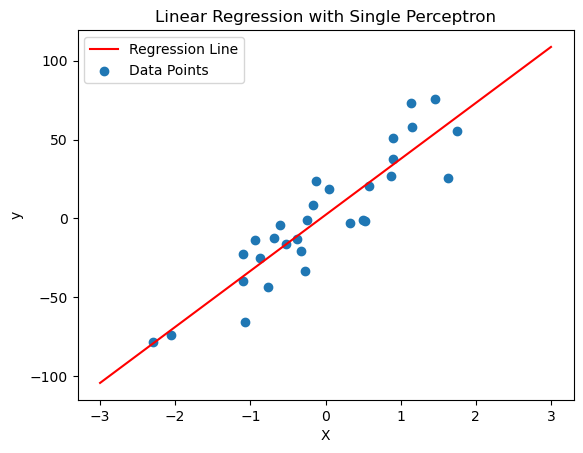

In [30]:
# Generate a range of x values for plotting the regression line
x = np.linspace(-3, 3, 50)
# Compute the predicted y values using the trained parameters
y_pred = W @ x.reshape(1, -1) + b

# Plot the regression line and the data points
plt.plot(x, y_pred[0], c='r', label='Regression Line')
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Single Perceptron')
plt.legend()
plt.show()

### Neural Network Model with a Single Perceptron and Two Input Nodes

In [31]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
# Load house prices dataset
df = pd.read_csv('house_prices_train.csv', index_col='Id')

In [33]:
# Check and print the percentage of missing values in each column
for column in df.columns:
    if np.sum(df[column].isna()) / 1460 > 0:
        print(f'{np.sum(df[column].isna()) / 1460 * 100 :0.2f}% of "{column}" is null.')

17.74% of "LotFrontage" is null.
93.77% of "Alley" is null.
59.73% of "MasVnrType" is null.
0.55% of "MasVnrArea" is null.
2.53% of "BsmtQual" is null.
2.53% of "BsmtCond" is null.
2.60% of "BsmtExposure" is null.
2.53% of "BsmtFinType1" is null.
2.60% of "BsmtFinType2" is null.
0.07% of "Electrical" is null.
47.26% of "FireplaceQu" is null.
5.55% of "GarageType" is null.
5.55% of "GarageYrBlt" is null.
5.55% of "GarageFinish" is null.
5.55% of "GarageQual" is null.
5.55% of "GarageCond" is null.
99.52% of "PoolQC" is null.
80.75% of "Fence" is null.
96.30% of "MiscFeature" is null.


In [34]:
# List to store columns with more than 6% missing values
cols = []
for column in df.columns:
    if np.sum(df[column].isna()) / 1460 * 100 > 6:
        cols.append(column)

# Drop columns with more than 6% missing values and rows with any missing values
df_new = df.drop(columns=cols)
df_new = df_new.dropna()

# Print the shapes of the original and cleaned datasets
print(f'df.shape: {df.shape}, df_new.shape: {df_new.shape}')

df.shape: (1460, 80), df_new.shape: (1338, 73)


In [35]:
# Number of features to select for the model
n_features = 2

# Convert categorical variables to dummy variables
df_new = pd.get_dummies(df_new, drop_first=True)

# Select top correlated features with the target variable 'SalePrice'
columns = df_new.corrwith(df_new['SalePrice']).abs().nlargest(n_features + 1).keys()[1:]
columns

Index(['OverallQual', 'GrLivArea'], dtype='object')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

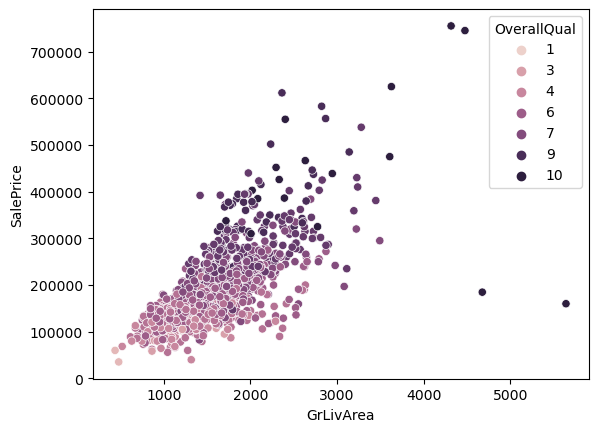

In [36]:
# Assign the selected features to X and target variable to y
X = df_new[columns]
y = df_new['SalePrice']

# Visualize the relationship between selected features and target variable
sns.scatterplot(data=df, x='GrLivArea', y=y, hue='OverallQual')

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [38]:
# Normalize the features for training and testing sets
X_train_norm = ((X_train - X.mean()) / X.std()).T.to_numpy()
X_test_norm = ((X_test - X.mean()) / X.std()).T.to_numpy()

# Normalize the target variable for training set
y_train_norm = (y_train - y.mean()) / y.std()
y_train_norm = np.reshape(y_train_norm, (1, -1))
y_test = np.reshape(y_test, (1, -1))

In [39]:
# Set hyperparameters
LEARNING_RATE = 0.05
EPOCHS = 100
n_x = X_train_norm.shape[0]  # Number of input features
n_y = 1  # Number of output features (single output)

# Train the model and get the final parameters
W, b = nn_model(X_train_norm, y_train_norm, n_x, n_y, EPOCHS, LEARNING_RATE, print_cost=True)

Epoch:0, Cost: 0.4480802118778229
Epoch:10, Cost: 0.20645631849765778
Epoch:20, Cost: 0.16360104084014893
Epoch:30, Cost: 0.1557408571243286
Epoch:40, Cost: 0.15413811802864075
Epoch:50, Cost: 0.15371187031269073
Epoch:60, Cost: 0.15354236960411072
Epoch:70, Cost: 0.15345023572444916
Epoch:80, Cost: 0.15339277684688568
Epoch:90, Cost: 0.15335528552532196


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

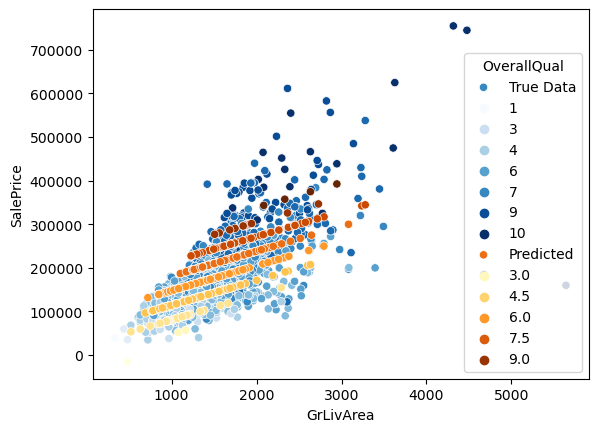

In [40]:
# Visualize the true data points
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='Blues', label='True Data')

# Predict the normalized target values using the trained model
y_values_norm = W @ X_test_norm + b 
# Convert the normalized predicted values back to original scale
y_values = y_values_norm * y.std() + y.mean()

# Create a dataframe with the test features and predicted target values
df2 = pd.DataFrame(np.hstack([X_test, y_values.T]), columns=[*columns, 'SalePrice'])

# Visualize the predicted data points
sns.scatterplot(data=df2, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='YlOrBr', label='Predicted')

In [21]:
# Evaluate the model using RMSE and R² score
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test.T, y_values.T))
print(f'RMSE : {RMSE}')
print(f'R2 Score: {r2_score(y_test.T, y_values.T)}')

RMSE : 40473.30983480431
R2 Score: 0.7130639812379657
